In [1]:
# 数据处理所需的库
import random
import numpy as np
import pandas as pd

# 数据可视化所需的库
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap  
from matplotlib.colors import LinearSegmentedColormap  
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

# 机器学习预处理所需的库
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 机器学习算法所需的库
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# 机器学习评价指标所需的库
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# 其他所需的库
import warnings
warnings.filterwarnings('ignore')

# 数据处理

## 加载数据

In [2]:
data = pd.read_csv(r'post COVID.csv')
data

,骑行量,白人人口比例,黑人人口比例,亚裔人口比例,无车人口比例,有车人口比例,人口密度,家庭收入中位数,劳动力人口比例
0,5903.0,0.105828,0.651002,0.145501,0.198881,0.273846,0.466258,69397.59036,0.574797
1,405.0,0.044027,0.866628,0.016349,0.153592,0.297290,0.412263,48793.10345,0.480455
2,19365.5,0.050260,0.866099,0.004658,0.313969,0.204672,0.112067,37122.66529,0.469423
3,50.0,0.041235,0.895686,0.007267,0.165786,0.307618,0.488096,71951.49017,0.499394
4,474.0,0.209159,0.660138,0.060149,0.174438,0.372746,0.618195,37484.19389,0.431496
...,...,...,...,...,...,...,...,...,...
72,231.5,0.811412,0.032325,0.016083,0.018100,0.350531,0.249258,54757.83476,0.480163
73,201.0,0.304030,0.614019,0.004188,0.048454,0.342511,0.223494,46380.45541,0.498301
74,7670.5,0.674542,0.066084,0.155517,0.044936,0.443514,0.036301,57937.30032,0.494509
75,230098.0,0.535192,0.132571,0.137308,0.189972,0.302251,1.211414,112555.20910,0.734462


## 初步认识特征

In [3]:
# 全是数值型特征，没有类别型和时间型特征
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   骑行量      77 non-null     float64
 1   白人人口比例   77 non-null     float64
 2   黑人人口比例   77 non-null     float64
 3   亚裔人口比例   77 non-null     float64
 4   无车人口比例   77 non-null     float64
 5   有车人口比例   77 non-null     float64
 6   人口密度     77 non-null     float64
 7   家庭收入中位数  77 non-null     float64
 8   劳动力人口比例  77 non-null     float64
dtypes: float64(9)
memory usage: 5.5 KB


## 数值型特征查看统计摘要

数量，均值，标准差，最小值，下四分位数，中位数，上四分位数，最大值

In [4]:
data.describe()

,骑行量,白人人口比例,黑人人口比例,亚裔人口比例,无车人口比例,有车人口比例,人口密度,家庭收入中位数,劳动力人口比例
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,41499.025974,0.279055,0.369343,0.064529,0.103776,0.292961,0.465112,59387.352015,0.522111
std,114057.981002,0.263694,0.385913,0.108146,0.068727,0.054419,0.261627,27981.448118,0.086711
min,18.500000,0.008337,0.004181,0.000000,0.013726,0.196919,0.036301,17216.786220,0.346632
25%,406.000000,0.044027,0.029843,0.003355,0.044716,0.250584,0.289452,37484.193890,0.464382
50%,1477.000000,0.147060,0.132571,0.022008,0.084258,0.288307,0.412263,54757.834760,0.501008
75%,12145.500000,0.487451,0.826605,0.085852,0.163444,0.334823,0.580048,73616.003060,0.568477
max,630945.500000,0.827213,0.964654,0.706661,0.313969,0.468684,1.244263,133537.464000,0.741492


## 删除重复值

In [5]:
print('删除重复值前数据集尺寸为:', data.shape)
data.drop_duplicates(keep='first', inplace=True)
print('删除重复值后数据集尺寸为:', data.shape)

删除重复值前数据集尺寸为: (77, 9)
删除重复值后数据集尺寸为: (77, 9)


## 填补缺失值

In [6]:
print('查看是否有缺失值:', data.isnull().sum())

查看是否有缺失值: 骑行量        0
白人人口比例     0
黑人人口比例     0
亚裔人口比例     0
无车人口比例     0
有车人口比例     0
人口密度       0
家庭收入中位数    0
劳动力人口比例    0
dtype: int64


## 修改异常值

对于异常值的处理要慎之又慎，因为有时候特征是有实际意义的，统计意义上的异常值可能并不影响结果。

如果实在不确定是否要修改异常值，可以根据模型结果来判断，如果修改异常值模型结果变好就修改。

In [7]:
temp = data.copy()
temp

,骑行量,白人人口比例,黑人人口比例,亚裔人口比例,无车人口比例,有车人口比例,人口密度,家庭收入中位数,劳动力人口比例
0,5903.0,0.105828,0.651002,0.145501,0.198881,0.273846,0.466258,69397.59036,0.574797
1,405.0,0.044027,0.866628,0.016349,0.153592,0.297290,0.412263,48793.10345,0.480455
2,19365.5,0.050260,0.866099,0.004658,0.313969,0.204672,0.112067,37122.66529,0.469423
3,50.0,0.041235,0.895686,0.007267,0.165786,0.307618,0.488096,71951.49017,0.499394
4,474.0,0.209159,0.660138,0.060149,0.174438,0.372746,0.618195,37484.19389,0.431496
...,...,...,...,...,...,...,...,...,...
72,231.5,0.811412,0.032325,0.016083,0.018100,0.350531,0.249258,54757.83476,0.480163
73,201.0,0.304030,0.614019,0.004188,0.048454,0.342511,0.223494,46380.45541,0.498301
74,7670.5,0.674542,0.066084,0.155517,0.044936,0.443514,0.036301,57937.30032,0.494509
75,230098.0,0.535192,0.132571,0.137308,0.189972,0.302251,1.211414,112555.20910,0.734462


### 箱线图判断异常值

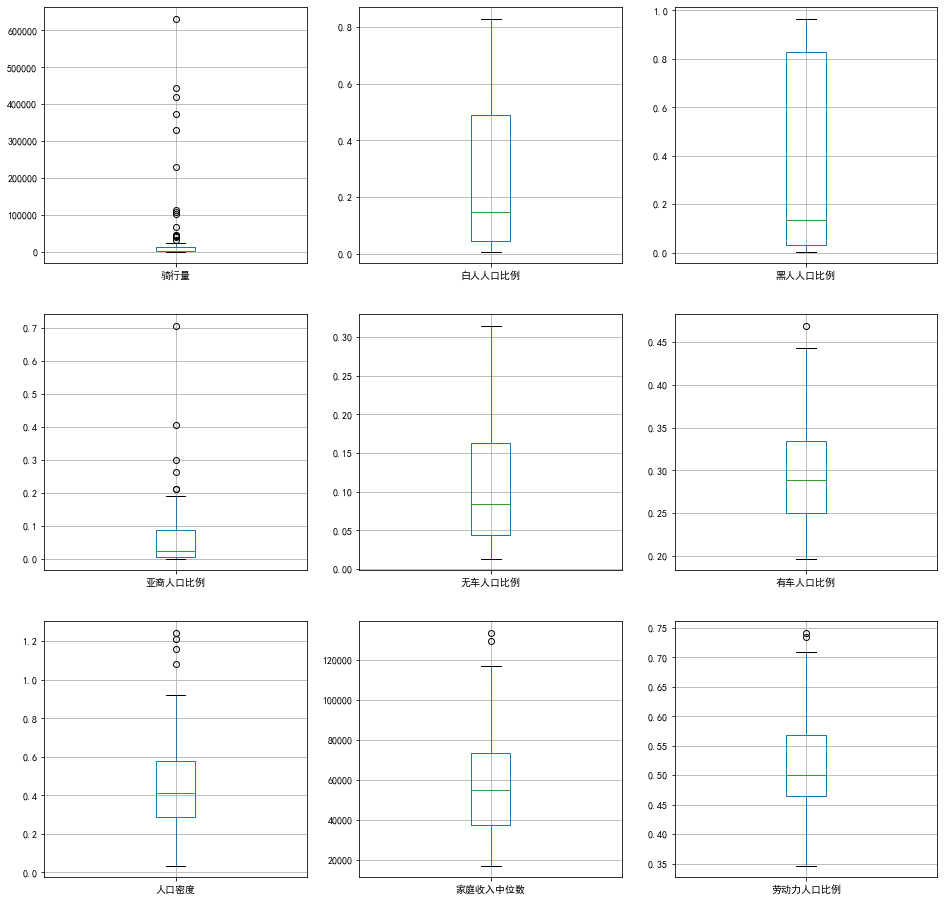

In [8]:
plt.figure(figsize=(16, 16))
# 此时需要把数值型特征提取出来，一共9个
numeric_cols = temp.select_dtypes(include=['int64', 'float64']).columns.tolist()
for i in range(1, len(numeric_cols)+1):
    plt.subplot(3,3,i)
    temp.boxplot(numeric_cols[i-1])

In [9]:
# 利用箱线图分析时，异常值通常被定义为小于QL-1.5*IQR或大于QU+1.5IQR（QL指下四分位数，QU指上四分位数，IQR指QU-QL）。
# 把异常值赋值为nan，然后就可以按照缺失值删除处理。
temp1 = temp.copy()
temp1

def outRange(Seri):
    QL = Seri.quantile(0.25)
    QU = Seri.quantile(0.75)
    IQR = QU-QL
    Seri[(Seri < QL-1.5*IQR) | (Seri > QU+1.5*IQR)] = np.nan
    return Seri
for i in numeric_cols:
    # 这是否真的是异常值还要结合现实情况进行分析
    print(f'特征{i}的异常值个数为：', outRange(temp1[i]).isnull().sum())

# 之所以又copytemp为temp1，是因为不copy话运行上述代码temp会改变
temp1

特征骑行量的异常值个数为： 15
特征白人人口比例的异常值个数为： 0
特征黑人人口比例的异常值个数为： 0
特征亚裔人口比例的异常值个数为： 6
特征无车人口比例的异常值个数为： 0
特征有车人口比例的异常值个数为： 1
特征人口密度的异常值个数为： 4
特征家庭收入中位数的异常值个数为： 2
特征劳动力人口比例的异常值个数为： 2


,骑行量,白人人口比例,黑人人口比例,亚裔人口比例,无车人口比例,有车人口比例,人口密度,家庭收入中位数,劳动力人口比例
0,5903.0,0.105828,0.651002,0.145501,0.198881,0.273846,0.466258,69397.59036,0.574797
1,405.0,0.044027,0.866628,0.016349,0.153592,0.297290,0.412263,48793.10345,0.480455
2,19365.5,0.050260,0.866099,0.004658,0.313969,0.204672,0.112067,37122.66529,0.469423
3,50.0,0.041235,0.895686,0.007267,0.165786,0.307618,0.488096,71951.49017,0.499394
4,474.0,0.209159,0.660138,0.060149,0.174438,0.372746,0.618195,37484.19389,0.431496
...,...,...,...,...,...,...,...,...,...
72,231.5,0.811412,0.032325,0.016083,0.018100,0.350531,0.249258,54757.83476,0.480163
73,201.0,0.304030,0.614019,0.004188,0.048454,0.342511,0.223494,46380.45541,0.498301
74,7670.5,0.674542,0.066084,0.155517,0.044936,0.443514,0.036301,57937.30032,0.494509
75,NaN,0.535192,0.132571,0.137308,0.189972,0.302251,NaN,112555.20910,NaN


### 判断完异常值用四分位数进行替换

In [10]:
def outRange(Seri):
    QL = Seri.quantile(0.25)
    QU = Seri.quantile(0.75)
    IQR = QU-QL
    Seri.loc[Seri < QL-1.5*IQR] = QL
    Seri.loc[Seri > QU+1.5*IQR] = QU
    return Seri
for i in numeric_cols:
    temp[i] = outRange(temp[i])
temp

,骑行量,白人人口比例,黑人人口比例,亚裔人口比例,无车人口比例,有车人口比例,人口密度,家庭收入中位数,劳动力人口比例
0,5903.0,0.105828,0.651002,0.145501,0.198881,0.273846,0.466258,69397.59036,0.574797
1,405.0,0.044027,0.866628,0.016349,0.153592,0.297290,0.412263,48793.10345,0.480455
2,19365.5,0.050260,0.866099,0.004658,0.313969,0.204672,0.112067,37122.66529,0.469423
3,50.0,0.041235,0.895686,0.007267,0.165786,0.307618,0.488096,71951.49017,0.499394
4,474.0,0.209159,0.660138,0.060149,0.174438,0.372746,0.618195,37484.19389,0.431496
...,...,...,...,...,...,...,...,...,...
72,231.5,0.811412,0.032325,0.016083,0.018100,0.350531,0.249258,54757.83476,0.480163
73,201.0,0.304030,0.614019,0.004188,0.048454,0.342511,0.223494,46380.45541,0.498301
74,7670.5,0.674542,0.066084,0.155517,0.044936,0.443514,0.036301,57937.30032,0.494509
75,12145.5,0.535192,0.132571,0.137308,0.189972,0.302251,0.580048,112555.20910,0.568477


&emsp;&emsp;**这样data就是没对异常值进行处理，temp是对异常值处理，后续以temp建模。**

# 特征工程

## 相关性分析(相关性不大，都留着）

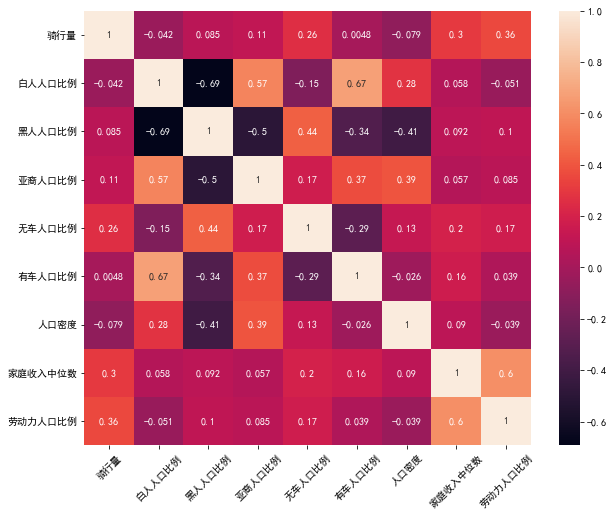

In [11]:
# 计算皮尔逊相关系数  
corrcoef = temp.corr()  
  
# 可视化相关系数  
plt.figure(figsize=(10, 8))  
sns.heatmap(corrcoef, annot=True)  
plt.xticks(rotation=45)  
plt.show()

## 主成分分析

In [12]:
X = temp[['白人人口比例', '黑人人口比例', '亚裔人口比例', '无车人口比例', '有车人口比例', '人口密度',
       '家庭收入中位数', '劳动力人口比例']]
y = temp['骑行量']
scaler = StandardScaler()  
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) 
pca = PCA(n_components=6)
pca.fit_transform(df_scaled)
# 通过属性components_可以查看主成分
# pca.components_.T[:, 0]
# 通过可解释方差比衡量差异性贡献度
print('前6个主成分的贡献度之和为：', sum(pca.explained_variance_ratio_))
print('前6个主成分的贡献度为：', pca.explained_variance_ratio_)

前6个主成分的贡献度之和为： 0.9505070663641575
前6个主成分的贡献度为： [0.35088895 0.22371742 0.16314296 0.10571649 0.06601857 0.04102268]


Text(0.5, 1.0, '主成分贡献度')

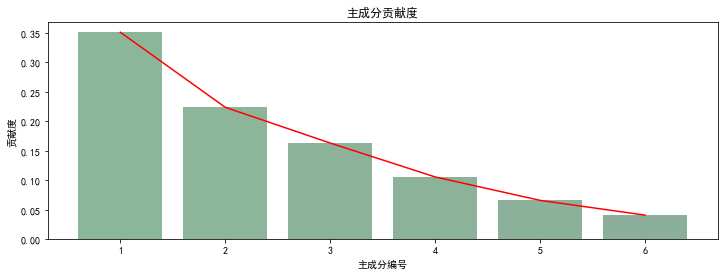

In [13]:
# 创建自定义颜色映射  
np.random.seed(0)
colors = [(np.random.random(), np.random.random(), np.random.random()) for _ in range(6)]  
cmap = LinearSegmentedColormap.from_list('random_cmap', colors)  

plt.figure(figsize=(12, 4))  
plt.title("Feature importances")  
plt.bar(range(1, 1+len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, color=cmap(np.arange(X.shape[1])), align="center") 
plt.plot(range(1, 1+len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,'r')
plt.xlabel('主成分编号')
plt.ylabel('贡献度')
plt.title('主成分贡献度')

# 划分训练集和测试集

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    df_scaled, y, test_size=0.2, random_state=2
)

# 回归模型

## 线性回归

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print('LR测试集结果为：', y_pred)
print('训练集均方误差为：', mean_squared_error(y_train, model.predict(x_train)))
print('测试集均方误差为：', mean_squared_error(y_test, y_pred))
print('回归系数，偏置项为：', model.coef_, model.intercept_)

LR测试集结果为： [ 3597.51925704  7866.77102946  5533.04141232  6961.54563716
  -189.95783757   380.11208806  -444.07495641  4435.74131666
 -1503.91443426  6372.96934984  6445.67197574 10164.65260403
  2108.65277449  8498.27229682  6554.32342409   653.886392  ]
训练集均方误差为： 27695994.24273212
测试集均方误差为： 25516858.33737707
回归系数，偏置项为： [-1575.75834282 -1608.85988885   640.39917564  1878.54023226
  -122.10996845 -1451.60830349  1108.77927652  1437.17073644] 5024.48977051262


## 岭回归

In [16]:
model = Ridge(random_state=42)
param_grid = [{'alpha':np.arange(0, 100, 0.1)}]
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

model = Ridge(alpha=grid_search.best_params_['alpha'], random_state=42)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print('岭回归测试集结果为：', y_pred)
print('训练集均方误差为：', mean_squared_error(y_train, model.predict(x_train)))
print('测试集均方误差为：', mean_squared_error(y_test, y_pred))
print('回归系数，偏置项为：', model.coef_, model.intercept_)

岭回归测试集结果为： [4648.06626418 7580.59768568 5023.13530788 5338.34826912 2577.71663617
 1797.66361017 1524.52658205 5060.52007462  969.28253467 4816.08064399
 6250.0614465  8915.23181459 3665.05259183 6495.23428464 5732.7434147
 2181.43774703]
训练集均方误差为： 29196796.839486096
测试集均方误差为： 20640718.987079076
回归系数，偏置项为： [-436.28041462   -2.62004685  468.76156783  801.63438411 -326.76792673
 -590.89486874  787.45169939 1033.16301455] 5091.249336465151


## lasso回归

In [17]:
model = Lasso(random_state=4)

param_grid = [{'alpha':np.arange(0, 100, 0.1)}]
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

model = Lasso(alpha=grid_search.best_params_['alpha'], random_state=42)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print('lasso回归测试集结果为：', y_pred)
print('训练集均方误差为：', mean_squared_error(y_train, model.predict(x_train)))
print('测试集均方误差为：', mean_squared_error(y_test, y_pred))
print('回归系数，偏置项为：', model.coef_, model.intercept_)

lasso回归测试集结果为： [ 4049.17517211  7869.98905573  5188.38584305  6353.03947296
   795.62763845   624.6055068    360.76721186  4714.24274313
  -656.0863706   5683.67853997  6544.63247397 10224.98819404
  2532.84516224  7887.97688848  6177.77089124  1043.5946647 ]
训练集均方误差为： 27900688.858032838
测试集均方误差为： 23551995.89996486
回归系数，偏置项为： [-1015.21260168  -847.7403106    583.99588646  1495.54487231
  -225.68658195 -1135.97675415   937.08614629  1432.8432127 ] 5049.94458556


## 支持向量机回归

不同核函数:
如何选择适合您的数据集的最佳核函数完全取决于您实际解决的问题。如果您的数据能够被线性分割，那么毫无疑问，选择线性核函
数是一个不错的选择，因为它需要更少的训练时间，并在文本分类等大型数据集处理方面表现出色。另一方面，当数据缺乏额外信息
或不可用时，高斯核函数通常能够提供出色的结果。RBF核函数也是高斯核函数的一种，它通过将高维数据映射后，在其中寻找线性分
割。对于已经归一化的所有训练数据，多项式核函数通常能够产生出色的结果。

In [18]:
model = SVR()
param_grid = [{'C':np.arange(0.1, 10, 0.1)}]
# cv表示交叉验证的次数，scoring表示评价指标，分类可以选'accuracy'，'precision'，'recall'，'f1'，'roc_auc'，回归选neg_mean_squared_error
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

model = SVR(C=grid_search.best_params_['C'])
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print('SVM测试集结果为：', y_pred)
print('训练集均方误差为：', mean_squared_error(y_train, model.predict(x_train)))
print('测试集均方误差为：', mean_squared_error(y_test, y_pred))

SVM测试集结果为： [1499.90393074 1526.66273764 1490.19584593 1499.70121439 1488.85640108
 1479.69998989 1478.74221447 1503.17728112 1478.50069453 1488.81734582
 1515.9692127  1531.83251182 1507.69351941 1519.99162314 1507.59200262
 1479.67591991]
训练集均方误差为： 51301999.80545702
测试集均方误差为： 11726771.252454206


## 决策树回归

In [19]:
model = DecisionTreeRegressor(random_state=42)  
param_grid = [{'max_depth':np.arange(1, 10, 1)}]
# cv表示交叉验证的次数，scoring表示评价指标，分类可以选'accuracy'，'precision'，'recall'，'f1'，'roc_auc'，回归选neg_mean_squared_error
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'], random_state=42)  
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print('DT测试集结果为：', y_pred)
print('训练集均方误差为：', mean_squared_error(y_train, model.predict(x_train)))
print('测试集均方误差为：', mean_squared_error(y_test, y_pred))

DT测试集结果为： [ 3871.32        3871.32        3871.32       11444.04545455
  3871.32        3871.32        3871.32        3871.32
  3871.32        3871.32        3871.32       11444.04545455
  3871.32        3871.32        3871.32        3871.32      ]
训练集均方误差为： 29051094.764053654
测试集均方误差为： 22276466.521619625


## XGB回归

In [20]:
model = XGBRegressor()

# 可以通过print(XGBClassifier.__doc__) 查看文档
param_grid = [
    {'n_estimators':[3,10,30], 'max_depth':[1,2,3,4,5], 'learning_rate':[0.001,0.003,0.01]},
    {'bootstrap':[False],'n_estimators':[3,10], 'max_depth':[1,2,3,4,5], 'learning_rate':[0.005,0.03]}
]
# cv表示交叉验证的次数，scoring表示评价指标，分类可以选'accuracy'，'precision'，'recall'，'f1'，'roc_auc'，回归选neg_mean_squared_error
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

model = XGBRegressor(n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    learning_rate=grid_search.best_params_['learning_rate'])
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print('XGB测试集结果为：', y_pred)
print('训练集均方误差为：', mean_squared_error(y_train, model.predict(x_train)))
print('测试集均方误差为：', mean_squared_error(y_test, y_pred))

XGB测试集结果为： [5925.0947 5925.0947 4333.755  7004.1587 4333.755  4333.755  4333.755
 4333.755  5578.254  5578.254  7132.862  7004.1587 5278.6655 6894.4556
 4333.755  4333.755 ]
训练集均方误差为： 27263744.140888084
测试集均方误差为： 19550237.234697595


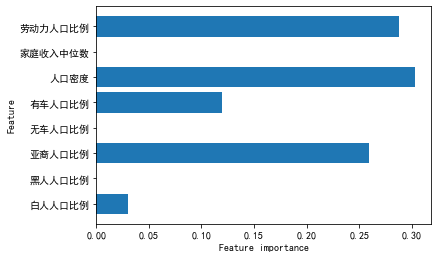

In [21]:
#自建函数
def plot_feature_importances_cancer(model):
    n_features = len(df_scaled.columns) 
    plt.barh(range(n_features), model.feature_importances_, align='center')  #条形图
    plt.yticks(np.arange(n_features), df_scaled.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
 
 #执行函数
plot_feature_importances_cancer(model)

## 随机森林回归

In [22]:
# 可以通过print(RandomForestClassifier.__doc__) 查看文档
model = RandomForestRegressor(random_state=42)
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3,4]}
]
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

model = RandomForestRegressor(n_estimators=100, random_state=123)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print('RT测试集结果为：', y_pred)
print('训练集均方误差为：', mean_squared_error(y_train, model.predict(x_train)))
print('测试集均方误差为：', mean_squared_error(y_test, y_pred))

RT测试集结果为： [ 6595.955  7657.545  2346.8    6695.08   4120.17   2272.13   3539.885
  1816.69   3577.915  7272.225  9776.15  10504.09   4802.16   7591.45
  5912.055  3654.035]
训练集均方误差为： 5323142.272463935
测试集均方误差为： 24207634.11383594


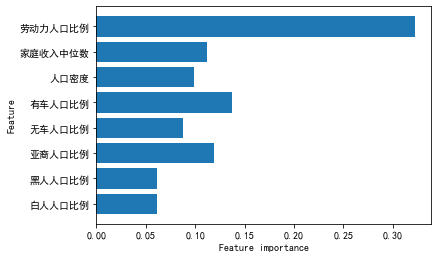

In [23]:
#自建函数
def plot_feature_importances_cancer(model):
    n_features = len(df_scaled.columns) 
    plt.barh(range(n_features), model.feature_importances_, align='center')  #条形图
    plt.yticks(np.arange(n_features), df_scaled.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
 
 #执行函数
plot_feature_importances_cancer(model)